<img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" width="780" height="140" align="right"/>


<p align="center">Análisis de Datos</p>


<p align="center"> Grupo:  59 </p>

 <p align="center"> Tarea 4 - Algoritmos de Aprendizaje no Supervisado</p>

 <p align="center">  Presentado por:  Diego Andres Arias Sanabria</p>

<p align="center"> Código:  202016908</p>

 <p align="center">  Tutor:  Handry Orozco</p>

 <p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD</p>

<p align="center"> Novienbre 17 de 2024</p>

# Agrupamiento en Hierarchical Clustering


### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [7]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')




El Hierarchical Clustering es una técnica de clustering no supervisado que permite agrupar a los clientes según sus comportamientos o características comunes. Es un conjunto de datos utilizado comúnmente en análisis de marketing, en particular para realizar segmentaciones de clientes, análisis de comportamiento y optimización de campañas publicitarias. Este dataset contiene información de clientes de un Centro Comerical, con diversas características que permiten segmentar a los clientes en función de ingresos anuales y puntuacion de gasto demográficas.


In [32]:
# Cargar el conjunto de datos en la variable data
data = pd.read_csv('Mall_Customers.csv', sep=';')


In [34]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


CustomerID: ID del Cliente.
Gender: Género.
Age: Edad del Cliente.
Annual Income (k$): Ingresos Anuales.
Spending Score (1-100): Puntuación de gastos (1-100).

In [40]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [42]:

# Obtener información sobre el tipo de datos y el total de valores en cada columna
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Explicación resultado:
* Tipo de Datos (<class 'pandas.core.frame.DataFrame'>):
Esto indica que el objeto que has cargado es un DataFrame, que es una tabla de datos similar a una hoja de cálculo de Excel o una tabla SQL, donde las filas y columnas se indexan y etiquetan.

* RangeIndex: 200 entries, 0 to 199:
El índice del DataFrame tiene 200 filas, numeradas desde 0 hasta 199. Esto significa que hay 200 registros (clientes, en este caso).

* Data columns (total 5 columns): CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100).
  
* Non-Null Count: Cada columna tiene 200 valores no nulos, lo que indica que no hay datos faltantes en este conjunto de datos para estas variables.

* Dtype: Todas las columnas tienen el tipo de dato int64, y object lo que significa que los valores en estas columnas son enteros de 64 bits y valores de objeto.

* Memory usage: 7.9+ KB: El DataFrame ocupa aproximadamente 7.9 KB en memoria, lo que es un tamaño es pequeño para este conjunto de datos.

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

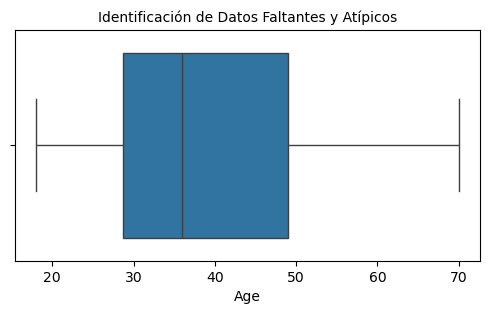

In [54]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age']) #Recientes
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario


### Identificar datos Faltantes

In [58]:
# Identificar columnas con datos faltantes
print(data.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64





* **Eliminar filas con datos faltantes**: Puedes eliminar las filas o columnas con valores faltantes si son pocas y no impactan significativamente el análisis.
data_clean = data.dropna()

* **Rellenar valores faltantes con la media de la columna** Rellenar los valores faltantes con un valor como la media, mediana, o moda de la columna.

data['columna'] = data['columna'].fillna(data['columna'].mean())

* **Imputación avanzada: Usar técnicas más sofisticadas como KNN o modelos de regresión para predecir los valores faltantes.**
Técnicas adicionales:

Interpolación: Puedes usar la interpolación para llenar los valores faltantes en series temporales.
data['columna'] = data['columna'].interpolate()


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

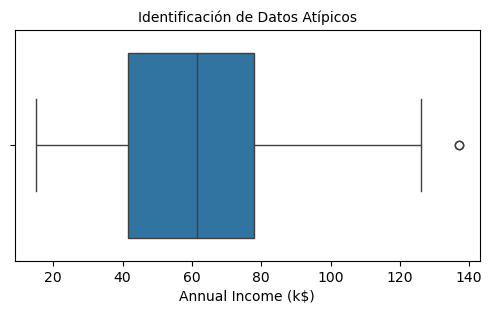

In [61]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Annual Income (k$)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [67]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((data['Annual Income (k$)']<nivel_minimo)|(data['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 14


In [69]:
# Filtra Datos Atípicos

Datos=data[(data['Annual Income (k$)']<nivel_maximo)&(data['Annual Income (k$)']>nivel_minimo)]

In [71]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              186 non-null    int64 
 1   Gender                  186 non-null    object
 2   Age                     186 non-null    int64 
 3   Annual Income (k$)      186 non-null    int64 
 4   Spending Score (1-100)  186 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.7+ KB


### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Para seleccionar las características más relevantes del dataset Marketing Campaign para entrenar un modelo de Hierarchical Clustering, es importante entender cuáles variables pueden realizar  segmentación de clientes. 

* Aspectos demográficos,
* comportamientos de gastos

1. Las características demográficas brindan información sobre el perfil básico de los clientes:
 
* Age: La edad del cliente puede influir en sus patrones de compra y preferencias.
* Annual income (K$): El ingreso anual puede influir dado que si tiene mas ingresos puede puede comprar cosas mas costosas o en mas cantidad.

2. Selección de características de comportamiento de gastos:
Estas características se enfocan en cómo los clientes interactúan con el centro comercial en términos de comportamiento del cliente y la naturaleza del gasto:

* Spending Score (1-100): Puntos asignados por el centro comercial. Para verificar el comportamiento del cliente ante la frecuancia de gastos.

In [150]:
# Revisión de los datos de las variables objetivo
Datos[["Age","Annual Income (k$)"]].head(100)

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
95,24,60
96,47,60
97,27,60
98,48,61


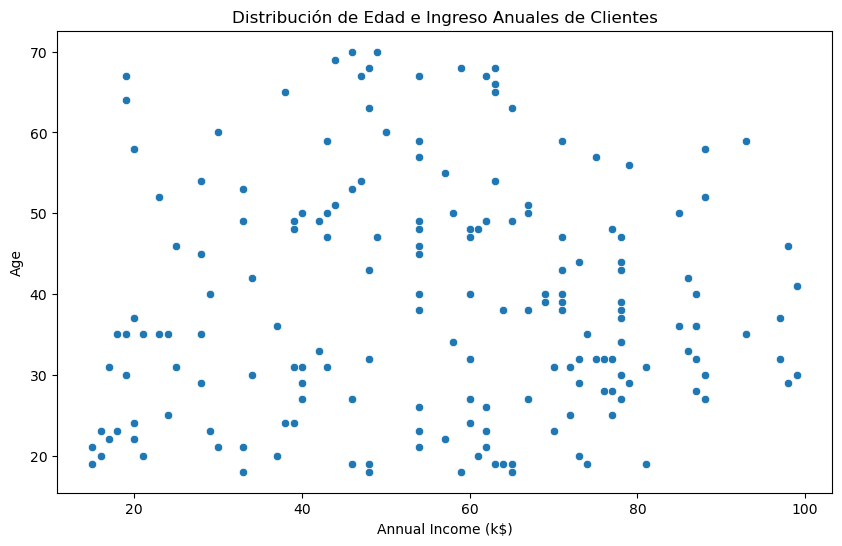

In [152]:
# Grafica antes del agrupamiento

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos['Annual Income (k$)'], y=Datos['Age'])
plt.title('Distribución de Edad e Ingreso Anuales de Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

### 4. Entrenar el modelo configurando los diferentes hiperparámetros

**Preparación de los Datos**
Para aplicar el modelo de clustering jerárquico, es recomendable estandarizar los datos si contienen diferentes escalas. Esto se hace con el StandardScaler de scikit-learn, que centra los datos alrededor de 0 y les da una desviación estándar de 1:

In [154]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Age', 'Annual Income (k$)']])

**Visualización del Dendrograma**
Antes de aplicar el modelo, es común visualizar el dendrograma para tener una idea de cómo se agruparán los datos. Esto se puede hacer con la función linkage de SciPy y dendrogram para mostrar el árbol de agrupamiento.

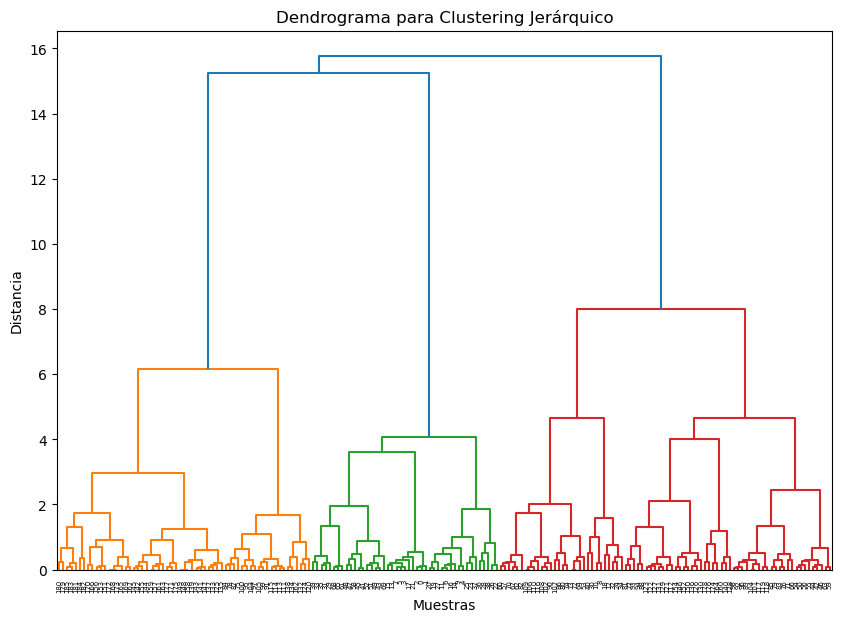

In [156]:

# Verifique y maneje valores no finitos en scaled_data
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Continue with hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

 En este gráfico, cada fusión (cada rama que se une) representa la combinación de dos clústeres o muestras.
Las ramas largas indican que las muestras o clústeres que se están uniendo tienen gran disimilitud, mientras que las ramas cortas indican que los elementos fusionados son muy similares.
En función de la distancia en el eje Y, puedes determinar cuántos clústeres deseas extraer del análisis de agrupamiento, ya que el corte en el dendrograma a una cierta altura te dará el número de grupos a conservar.

Interpretación:

Ingresos Anuales: Las muestras con ingresos similares tenderán a unirse en ramas cortas, lo que indica que las personas con ingresos anuales parecidos tienden a tener característica similar en la otra variable.

Edad: Los grupos de edad similarmente agrupados pueden aparecer en el dendrograma con ramas cortas. Las personas de edades similares pueden compartir comportamientos de compra similares, especialmente cuando se observan en el contexto de factor como el ingreso anual.

In [159]:

# Asumiendo que 'Datos' es DataFrame
# Reemplazar NaN con la media de cada columna
Datos[['Age', 'Annual Income (k$)']] = Datos[['Age', 'Annual Income (k$)']].fillna(Datos[['Age', 'Annual Income (k$)']].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Age', 'Annual Income (k$)']])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.4149728314518604
Índice de Calinski-Harabasz: 166.91912554113833
Índice de Davies-Bouldin: 0.8016525985689387


### 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

 * **Gráfico de Dispersión para Visualización de Clusters**

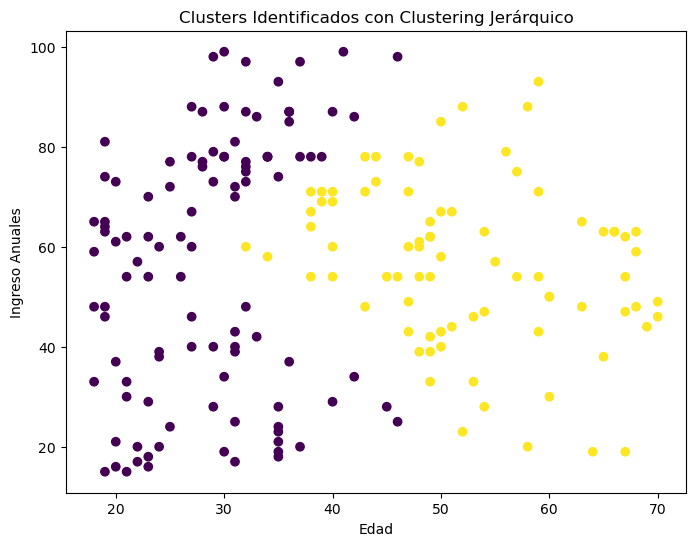

In [173]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=2)  # Ajustar el número de clusters
Datos['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(Datos['Age'], Datos['Annual Income (k$)'], c=Datos['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anuales')
plt.show()

Este gráfico te muestra cómo se agrupan las muestras según las características seleccionadas, en este caso, Edad e Ingreso Anuales. Los puntos de diferentes colores representan diferentes clusters.

* **Gráfico de Silueta**

Este gráfico muestra cuán similar es cada punto a su propio grupo en comparación con otros grupos. Un valor alto (cercano a 1) indica que los puntos están bien agrupados, mientras que un valor bajo (cercano a -1) indica que están mal asignados.

Silhouette Score: 0.32099111321742296


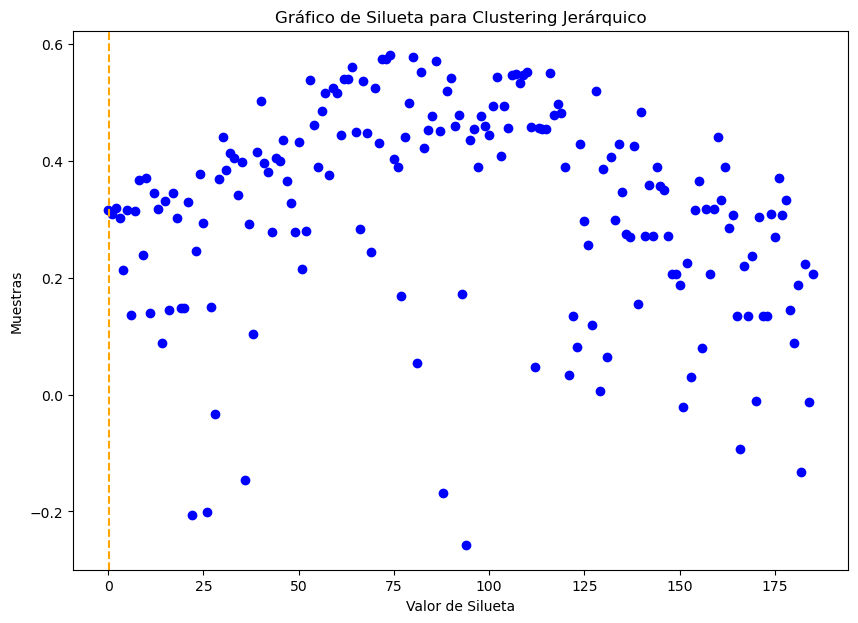

In [204]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="orange", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()


Interpretación: El valor de la silueta ayuda a medir la calidad del clustering. Un valor cercano a +1 indica una buena asignación de los puntos a los clusters, mientras que valores cercanos a -1 indican que los puntos podrían estar mal clasificados.

### **7. Interpretar, analizar y documentar los resultados obtenidos**

* La edad e ingresos anuales se ve que existe una cierta relacion del cliente puede que influya dado que a medida que aumenta la edad igualmente aumenta el ingreso anual.
* En el gráfico de silueta las Silhouettes están mas agrupadas y cercanas a +1, eso nos indica que la mayoría de los puntos están correctamente asignados a su cluster y que los clusters están bien separados.
* Un valor de 0.4149 de Coeficiente de Silhouette indica que los clusters están razonablemente bien separados, pero podria haber espacio para para mejorar la separación.
* El índice de Calinski-Harabasz es de 166.91 es bastante alto, lo que sugiere que los clusters son relativamente bien separados y que hay poca variabilidad dentro de cada cluster. 
* Davies-Bouldin de 0.8016 indica que los clusters son moderados. Si bien no es muy bajo, tampoco es muy alto, lo que sugiere que los clusters podrian no estar bien separados como se esperaria.